In [2]:
def survival_classifier(seat_belt, highway, speed, age):
    # 질문 노드: 안전 벨트를 했나요?
    if seat_belt:
        return 0  # 했으면 생존 리턴
    else:
        # 질문 노드: 사고가 고속도로였나요?
        if highway:
            # 질문 노드: 시속 100km를 넘었나요?
            if speed > 100:
                # 질문 노드: 사고자 나이가 50을 넘었나요?
                if age > 50:
                    return 1  # 사고자 나이가 50을 넘었으면 사망 리턴
                else:
                    return 0  # 사고자 나이가 50을 넘지 않았다면 생존 리턴
            else:
                return 0  # 시속 100km를 넘지 않았다면 생존 리턴
        else:
            return 0  # 고속도로가 아니였다면 생존 리턴


# 테스트 코드
print(survival_classifier(False, True, 110, 55))
print(survival_classifier(True, False, 40, 70))
print(survival_classifier(False, True, 80, 25))
print(survival_classifier(False, True, 120, 60))
print(survival_classifier(True, False, 30, 20))


1
0
0
1
0


## 지니불순도
(데이터 셋 안에 서로 다른 불류들이 얼만큼 섞여 있는지)

(지니불순도가 작은 수록 데이터 셋이 순수하고, 클수록 데이터 셋이 불순하다.)

In [3]:
def gini_binary(count_pos, count_neg):
    """두 클래스 지니 불순도 계산해요 😊"""
    total = count_pos + count_neg              # 🧮 전체 개수
    p1 = count_pos / total                     # 🍬 클래스1 비율
    p2 = count_neg / total                     # 🍬 클래스2 비율
    gi = 1 - (p1**2) - (p2**2)                 # ✏️ GI 공식
    return gi

gi = gini_binary(150, 60)
print(round(gi, 4))  # 🔢 4자리 반올림 → 0.4082


0.4082


In [5]:
def gini_binary(count_pos, count_neg):
    """두 클래스 지니 불순도 계산해요 😊"""
    total = count_pos + count_neg              # 🧮 전체 개수
    p1 = count_pos / total                     # 🍬 클래스1 비율
    p2 = count_neg / total                     # 🍬 클래스2 비율
    gi = 1 - (p1**2) - (p2**2)                 # ✏️ GI 공식
    return gi

gi = gini_binary(600, 700)
print(round(gi, 4))  # 🔢 4자리 반올림 → 0.4082

0.497


In [13]:
a = 600
b = 700
c = a/(a+b)
d = b/(a+b)
e = c * c
f = d * d
g = 1 - e - f
g

0.49704142011834324

In [6]:
def gini_binary(count_pos, count_neg):
    """두 클래스 지니 불순도 계산해요 😊"""
    total = count_pos + count_neg              # 🧮 전체 개수
    p1 = count_pos / total                     # 🍬 클래스1 비율
    p2 = count_neg / total                     # 🍬 클래스2 비율
    gi = 1 - (p1**2) - (p2**2)                 # ✏️ GI 공식
    return gi

gi = gini_binary(350, 50)
print(round(gi, 4))  # 🔢 4자리 반올림 → 0.4082

0.2188


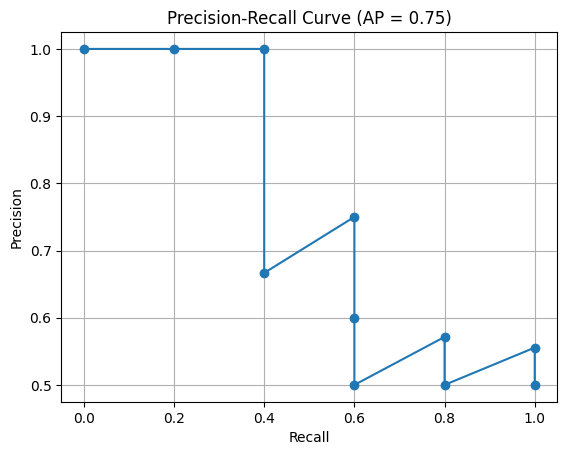

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# 🎯 가짜 데이터 (정답 y_true, 예측 확률 y_scores)
y_true = np.array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])  # 실제 정답 (1=사과 있음, 0=없음)
y_scores = np.array([0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.4, 0.3, 0.2, 0.1])  # 모델이 "사과일 확률"

# 📈 Precision-Recall 곡선 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# 🧮 AP 계산 (곡선 아래 면적)
ap = auc(recall, precision)

# 그래프 그리기
plt.plot(recall, precision, marker='o')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {ap:.2f})")
plt.grid(True)
plt.show()



In [10]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc

# 🎯 가짜 데이터 (실제 라벨과 모델 확률 예측값)
y_true = np.array([1, 1, 0, 2, 2, 0, 3, 3, 1, 0])   # 실제 클래스 (1=사과, 2=바나나, 3=오렌지)
# 모델이 각 클래스(사과, 바나나, 오렌지)일 확률 예측 (10개 샘플 × 3클래스)
y_scores = np.array([
    [0.9, 0.05, 0.05],  # 샘플 1
    [0.8, 0.1, 0.1],
    [0.6, 0.2, 0.2],
    [0.2, 0.7, 0.1],
    [0.1, 0.8, 0.1],
    [0.3, 0.3, 0.4],
    [0.2, 0.1, 0.7],
    [0.1, 0.2, 0.8],
    [0.7, 0.2, 0.1],
    [0.4, 0.3, 0.3],
])

classes = [1, 2, 3]  # 사과, 바나나, 오렌지
ap_scores = []

for i, cls in enumerate(classes):
    # 🔄 One-vs-Rest 방식으로 각 클래스에 대해 계산
    y_true_binary = (y_true == cls).astype(int)   # 해당 클래스는 1, 나머지는 0
    y_score = y_scores[:, i]                      # 해당 클래스 예측 확률만 뽑기

    precision, recall, _ = precision_recall_curve(y_true_binary, y_score)
    ap = auc(recall, precision)  # 면적 계산
    ap_scores.append(ap)
    print(f"클래스 {cls} AP = {ap:.2f}")

# 📊 mAP 계산
mAP = np.mean(ap_scores)
print(f"\n👉 최종 mAP = {mAP:.2f}")


클래스 1 AP = 1.00
클래스 2 AP = 1.00
클래스 3 AP = 1.00

👉 최종 mAP = 1.00


In [13]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# 🎯 실제 라벨: 1=사과, 2=바나나, 3=오렌지
y_true = np.array([1, 1, 0, 2, 2, 0, 3, 3, 1, 0])

# 🧪 예측 점수(10개 샘플 × 3클래스) — 일부러 헷갈리도록 노이즈 섞음
y_scores = np.array([
    [0.90, 0.85, 0.05],  # cls2 점수 높임 → 바나나에 FP 유도
    [0.80, 0.10, 0.75],  # cls3 점수 높임 → 오렌지에 FP 유도
    [0.60, 0.20, 0.20],
    [0.20, 0.55, 0.10],  # 바나나(양성) 점수 낮춤 → FN 유도
    [0.10, 0.80, 0.10],
    [0.55, 0.30, 0.35],
    [0.20, 0.10, 0.45],  # 오렌지(양성) 점수 낮춤 → FN 유도
    [0.30, 0.25, 0.55],
    [0.40, 0.20, 0.10],  # 사과(양성) 점수 낮춤 → FN 유도
    [0.50, 0.50, 0.40],  # 애매한 샘플 → FP/FN 혼재
])

classes = [1, 2, 3]  # 사과, 바나나, 오렌지
for i, cls in enumerate(classes):
    y_true_bin = (y_true == cls).astype(int)  # 해당 클래스=1, 나머지=0
    scores = y_scores[:, i]

    precision, recall, _ = precision_recall_curve(y_true_bin, scores)
    ap_auc  = auc(recall, precision)                 # PR곡선 아래 면적(AUC 방식)
    ap_avg  = average_precision_score(y_true_bin, scores)  # AP의 또 다른 표준 정의

    print(f"클래스 {cls} → AP(AUC적분)={ap_auc:.3f},  AP(average_precision)={ap_avg:.3f}")

# 📊 mAP 계산
mAP = np.mean(ap_avg)
print(f"\n👉 최종 mAP = {mAP:.2f}")

클래스 1 → AP(AUC적분)=0.817,  AP(average_precision)=0.833
클래스 2 → AP(AUC적분)=0.417,  AP(average_precision)=0.583
클래스 3 → AP(AUC적분)=0.417,  AP(average_precision)=0.583

👉 최종 mAP = 0.58
